# Изучение рынка заведений общественного питания Москвы

## Цель и задачи

**Цель:** провести анализ данных рынка общественного питания Москвы и дать рекомендации заказчикам по выбору подходящего места для открытия точки.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных.
4. Сформулировать выводы по проведённому анализу и дать рекомендации.

## Данные

Для анализа поступила данные о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:
- `/datasets/rest_info.csv` - информация о заведениях общественного питания;
- `/datasets/rest_price.csv` -  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `/datasets/rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `/datasets/rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
  - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Структура проекта

1. [Загрузка данных и знакомство с ними.](#link_1)
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

____________________

<a class='anchor' id="link_1"></a>

## 1. Загрузка данных и знакомство с ними

Начнем с загрузки библиотек и датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных `rest_info` и `rest_price`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install phik -q
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные `rest_info` и `rest_price`
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `/datasets/rest_info.csv` - выведем первые строки методом `head()`, а информацию о датафрейме методом `info`:

In [3]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых содержится информация о заведениях общественного питания Москвы. 

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов оформлены в едином стиле, преобразований не понадобится.
- Большинство представленных данных хранится в типе `object`, что согласуется с содержимым столбцов. Столбцы `rating`, `seats` хранятся в типе `float64`. Столбец `chain` представлен типом `int64` и содержит значения 0 и 1. Для оптимизации работы можно уменьшить их разрядность.
- Пропуски содержаться в двух столбцах: `hours`, содержащем расписание работы заведений, и `seats`, в котором хранится информация о числе посадочных мест. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `/datasets/rest_price.csv`.

In [5]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания Москвы. По аналогии с предыдущим датасетом можно отметить, что:
- Названия столбцов оформлены в стиле snake_case, удобном для дальнейшей работы.
- Столбцы `id`, `price`, `avg_bill` имеют тип данных `object`, что корректно. Столбцы `middle_avg_bill` и `middle_coffee_cup` представлены в типе `float64`. Такой тип данных мог возникнуть из-за пропусков. Мы не будем их обрабатывать, так как у нас недостаточно информации для замены этих значений.
- Четыре столбца датафрейма содержат пропуски `price` (категория цен в заведении), `avg_bill` (средний чек в виде диапозона), `middle_avg_bill` (число с оценкой среднего чека), `middle_coffee_cup` (число с оценкой одной чашки капучино). Пропуски в первых двух столбцах, скорее всего, случайны, в то время как пропуски в оставшихся столбцах вызваны особенностью заполнения столбца `avg_bill`.
- Значения в столбцах соответствуют описанию.
 
Первичное знакомство показывает, что данные среднего качества. Необходимо поработать с пропусками в данных.

Объединим данные двух датасетов.

In [7]:
df = rest_info.merge(rest_price, on = 'id', how = 'left')

In [8]:
# Выведем на экран информацию об объединенном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные объединены и необходимая информация сохранена.

Новый датафрейм содержит 13 столбцов и 8406 строк.
____

## 2. Предобработка данных
### 2.1 Оптимизация типов данных

Проведем оптимизацию численных типов данных датафрейма, рекомендуется понизить разрядность числовых столбцов.
Для оптимизации будем использовать функцию `optimize_memory_usage`:

In [9]:
    # Оптимизация числовых типов данных
    def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df

In [10]:
optimize_memory_usage(df)

Размер использования памяти: до  0.83 Mb - после  0.65 Mb (22.1%)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [11]:
# Проверим наше преобразование с помощью атрибута dtypes()
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Мы провели оптимизацию типов данных:
- Столбцы `rating`, `seats`, `middle_avg_bill`, `middle_coffee_cup` были приведены к типу `float32` вместо `float64`.
- Столбец `chain` теперь имеет размерность `int8`, а не `int64`.
____________________________________

### 2.2 Работа с пропущенными значениями

При первичном анализе мы обнаружили пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [12]:
# Считаем абсолютное число пропусков в датафрейме, используя метод isna()
abs_miss = df.isna().sum().sort_values(ascending = False)
df_miss = pd.DataFrame(abs_miss)
df_miss.columns = ['Пропуски']
df_miss.style.background_gradient(cmap='RdPu', axis=0)

,Пропуски
middle_coffee_cup,7871
middle_avg_bill,5257
price,5091
avg_bill,4590
seats,3611
hours,536
id,0
name,0
category,0
address,0


In [13]:
# Считаем относительное число пропусков в датафрейме
rel_miss = (df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)
df_miss = pd.DataFrame(rel_miss)
df_miss.columns = ['Доля пропусков']
df_miss.style.background_gradient(cmap='RdPu', axis=0)

,Доля пропусков
middle_coffee_cup,93.635498
middle_avg_bill,62.538663
price,60.563883
avg_bill,54.603854
seats,42.957411
hours,6.376398
id,0.000000
name,0.000000
category,0.000000
address,0.000000


В датафрейме были обнаружены следующие пропуски в данных:
- Столбец `hours`, хранящий график работы заведения: содержит 536 пропусков, что составляет 6,37%. Предположительно, эти пропуски можно отнести к типу MCAR, то есть они совершенно случайны. Так как доля пропусков вели, то заменим их на 'нет данных'. В последующем будет просто фильтровать такие строки.
- Столбец `seats`, хранящий число посадочных мест: содержит 3611 пропусков, что составляет почти 43% от исходных данных. Причиной этому могут быть технические ошибки или же заведения, не предоставившие информацию о числе посадочных мест, работают только на вынос/доставку. Поэтому не будем менять этот столбец.
- Столбец `price`, хранящий информацию о категории цен в заведении: в нем содержится 5091 пропуск (60.6%). Пустые значения могли появиться из-за технических ошибок. Заменим их на 'нет данных'.
- Столбец `avg_bill` хранит информацию о средней стоимости заказа в виде диапозона. В нем найдено 4590 пропусков, это 54.6% от столбца. Заменим пустые значения на 'нет данных' аналогично предыдущему столбцу.
- Столбец `middle_avg_bill` содержит информацию о среднем чеке в заведении. Было обнаружено 5257 пустых строк, что составляет 62.5%. Мы не можем заменить их какими-либо значениями, так как для расчета среднего чека через группировку потребуется учесть множество факторов, таких как рейтинг заведения, категория и другие. Поэтому оставим столбец без изменения.
- Столбец `middle_coffee_cup` содержит среднюю цену за чашку каппучино. Найдено 7871 пропусков, что составило 93.6% от всего столбца. Причиной пустых строк может стать отсутствие каппучино в меню заведения. Поэтому мы не будем заполнять эти пропуски.

Далее посмотрим, есть ли в столбцах значения-индикаторы. Это поможет понять качество данных и избежать ошибок при их агрегации, когда значение-индикатор будет учитываться при расчёте среднего или медианы, что исказит исходные данные.

In [14]:
# Проверяем уникальные значения в столбцах
for column in ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Уникальные значения в столбце {column}')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце rating
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain
[0 1]

Уникальные значения в столбце seats
[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.200e+01 1.300e+01 1.400e+01
 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01 2.100e+01
 2.200e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01 2.800e+01 2.900e+01
 3.000e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01 3.600e+01 3.700e+01
 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01 4.300e+01 4.400e+01
 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01 5.000e+01 5.100e+01
 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01 5.800e+01 6.000e+01
 6.100e+01 6.200e+01 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01
 6.800e+01 6.900e+01 7.000e+01 7.200e+01 7.400e+01 7.500e+01 7.600e+01
 7.70

Все значения, представленные в этих столбцах, выглядят корректно. Нет значение, которые могли бы быть индикаторами. Поэтому продолжаем обработку данных дальше.

Не будем заменять пустые значения в столбце `price` на какое-либо значение, так как это может повлиять на расчет корреляции в последующем. Заменим пустые значения в столбцах `hours`, `avg_bill` на 'нет данных'. Напишем для этого цикл.

In [15]:
for column in ['hours', 'avg_bill']:
    df[column] = df[column].fillna('нет данных')

In [16]:
# Выведем информацию о датафрейме после заполнения пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 665.1+ KB


После обработки датафрейма осталось три столбца, содержащих пропуски: `price`, `seats`, `middle_avg_bill` и `middle_coffee_cup`. Теперь можно перейти к изучению дубликатов в данных.
_______

### 2.3 Явные и неявные дубликаты

Проверим на наличие дубликатов. Начнем с полных дубликатов, предварительно нормализовав названия заведений и адреса и сохранив исходное число строк.

In [17]:
lines = df.shape[0]

In [18]:
# Нормализуем выбранные столбцы
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [19]:
# Проверяем полные дубликаты в датафрейме 
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты - значения `id` должны быть уникальными, то есть каждая строка - уникальное заведение.

In [20]:
df.duplicated(subset = 'id').sum()

0

In [21]:
# Проверим дубликаты по названию заведения и адресу
duplicate = df[df.duplicated(subset = ['name', 'address'], keep = False)]
duplicates = df.duplicated(subset = ['name', 'address']).sum()
display(f'Найдено {duplicates} дубликатов')
display(duplicate)

'Найдено 4 дубликатов'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,нет данных,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,нет данных,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,нет данных,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,нет данных,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,нет данных,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,нет данных,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,нет данных,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,нет данных,4.1,0,276.0,NaN,нет данных,NaN,NaN


Очиведно, эти строки являются дубликатами. Удалим их с помощью метода drop_dublicates().

In [22]:
df.drop_duplicates(subset = ['name', 'address'], inplace = True)

Проверим, есть ли ошибки и неявные дубликаты в значениях категориальных данных.

In [23]:
for column in ['category', 'chain', 'price', 'district']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']



В категориальных данных нет ошибок и дубликатов.

Посчитаем число удаленных при обработке данных строк в абсолютном и относительном значении:

In [24]:
# Считаем абсолютное значение удаленных строк
deleted_lines = lines - df.shape[0]
display(f'Количество удаленных строк: {deleted_lines}')
percent_of_deleted = deleted_lines / lines * 100
display(f'Процент удаленных строк: {percent_of_deleted}')

'Количество удаленных строк: 4'

'Процент удаленных строк: 0.04758505829169641'

Таким образом, из датафрейма `df` было удалено 4 дубликата, что составило менее 1% данных.

___

### 2.4 Создание дополнительных столбцов в датафрейме

Для дальнейшей работы выделим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

Напишем код, который создаст новые столбец:

In [25]:
contains_daily = df['hours'].str.contains('ежедневно', na=False)
contains_24_7 = df['hours'].str.contains('круглосуточно', na=False)

df['is_24_7'] = contains_daily & contains_24_7  

Этот код создает новый столбец, проверяя два условия: содержится ли в строке подстрока 'ежедневно' и 'круглосуточно'. Если оба условия верны, то в новом столбце `is_24_7` появится результат True. Если нет - то False.

In [26]:
# Выведем данные нового датафрейма 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(4), int8(1), object(8)
memory usage: 738.5+ KB


Таким образом, мы получили датафрейм, состоящий из 14 столбцов и 8402 строк. Он был получен путем добавления столбца `is_24_7`, содержащего `bool`-значения: 
- `True`: заведение работает ежедневно и круглосуточно;
- `False`: заведение работает по иному графику. 

### Промежуточные выводы 

На этом предобработка завершена. В результате предобработки данных были выполнены следующие действия:
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, составили от 6.38 до 93.64% столбцов. Пустые значения были заменены на 'нет данных' в столбцах `hours` и `avg_bill`. В остальных пропуски были оставлены как есть. 
- Данные проверили на явные и неявные дубликаты — было удалено 4 строки, что составило менее 1% от исходного датафрейма.
- Был добавлен новый столбец `is_24_7` c обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение True — если заведение работает ежедневно и круглосуточно;
  - логическое значение False — в противоположном случае.

___________________

## 3. Исследовательский анализ данных

### 3.1 Исследование количества объектов общественного питания по каждой категории

Для начала рассмотрим, какие категории заведений представлены в датафрейме. Для этого обратимся к столбцу `category` и выведем его уникальные значения с помощью метода `unique`.

In [27]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Всего в датафрейме представлено 8 категорий заведений: 
- кафе,
- ресторан,
- кофейня,
- пиццерия,
- бар,паб,
- быстрое питание,
- булочная,
- столовая.

Узнаем общее количество заведений Москвы, после чего рассчитаем количество заведений каждой категории в абсолютном и относительном значении:

In [28]:
# Общее количество 
count = df.shape[0]
display(f'На территории Москвы находятся {count} заведения')

'На территории Москвы находятся 8402 заведения'

In [29]:
display('Количество заведений по значениям столбца category')
display(df['category'].value_counts())
# Рассмотрим распределение в относительных значениях
display()
display('Доля заведений по значениям столбца category')
df['category'].value_counts() / len(df) 

'Количество заведений по значениям столбца category'

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

'Доля заведений по значениям столбца category'

category
кафе               0.282790
ресторан           0.243037
кофейня            0.168174
бар,паб            0.090931
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: count, dtype: float64

Подкрепим наши данные графиком.

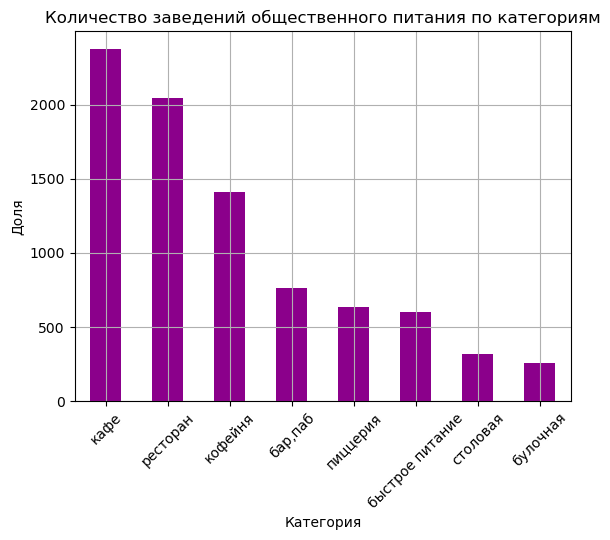

In [30]:
df['category'].value_counts().sort_values(ascending = False).plot(kind = 'bar',
                                                                                 rot = 45,
                                                                title = 'Количество заведений общественного питания по категориям',
                                                                xlabel = 'Категория',
                                                                ylabel = 'Доля',
                                                                color = 'darkmagenta')
plt.grid()
plt.show()

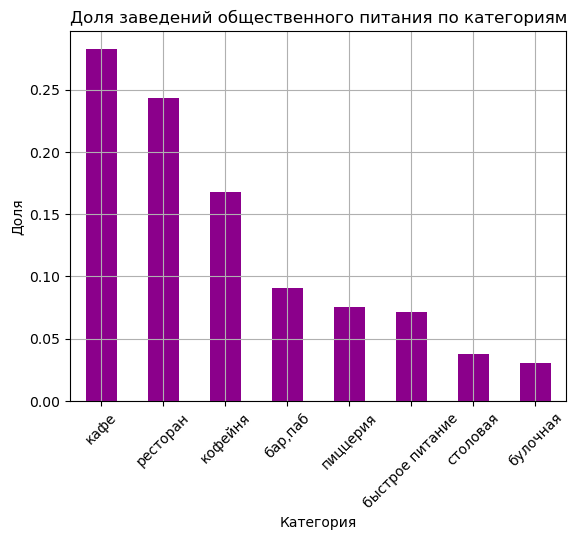

In [31]:
df['category'].value_counts(normalize = True).sort_values(ascending = False).plot(kind = 'bar',
                                                                                 rot = 45,
                                                                title = 'Доля заведений общественного питания по категориям',
                                                                xlabel = 'Категория',
                                                                ylabel = 'Доля',
                                                                color = 'darkmagenta')
plt.grid()
plt.show()

Таким образом, заведения общественного питания в Москве распределены неравномерно, всего их 8402. Наиболее часто встречающимися являются кафе (2376 точек). На их долю приходится 28% от всех заведений. На втором месте по популярности рестораны (2042 заведения, 24.3%).
Самый редкий тип - это булочные. Их в данных всего 256 штук, что составляет примерно 3%.
______________________

### 3.2 Исследование распределения заведений общественного питания по административным районам Москвы

Выведем административные районы Москвы, которые присутствуют в датафрейме.

In [32]:
# Удалим подстроку `административный округ` для удобной работы с данными и визуализациями
df['district'] = df['district'].str.replace('административный округ', '')
df['district'] = df['district'].str.strip()
df['district'].sort_values().unique()

array(['Восточный', 'Западный', 'Северный', 'Северо-Восточный',
       'Северо-Западный', 'Центральный', 'Юго-Восточный', 'Юго-Западный',
       'Южный'], dtype=object)

В данных представлено девять административных районов Москвы. Изучим, как между ними распределяются заведения.

In [33]:
display('Количество заведений общественного питания по округам Москвы')
display(df['district'].value_counts())

display('Доля заведений в разрезе административных округов Москвы')
display(df['district'].value_counts() / len(df))

'Количество заведений общественного питания по округам Москвы'

district
Центральный         2242
Северный             898
Южный                892
Северо-Восточный     890
Западный             850
Восточный            798
Юго-Восточный        714
Юго-Западный         709
Северо-Западный      409
Name: count, dtype: int64

'Доля заведений в разрезе административных округов Москвы'

district
Центральный         0.266841
Северный            0.106879
Южный               0.106165
Северо-Восточный    0.105927
Западный            0.101166
Восточный           0.094977
Юго-Восточный       0.084980
Юго-Западный        0.084385
Северо-Западный     0.048679
Name: count, dtype: float64

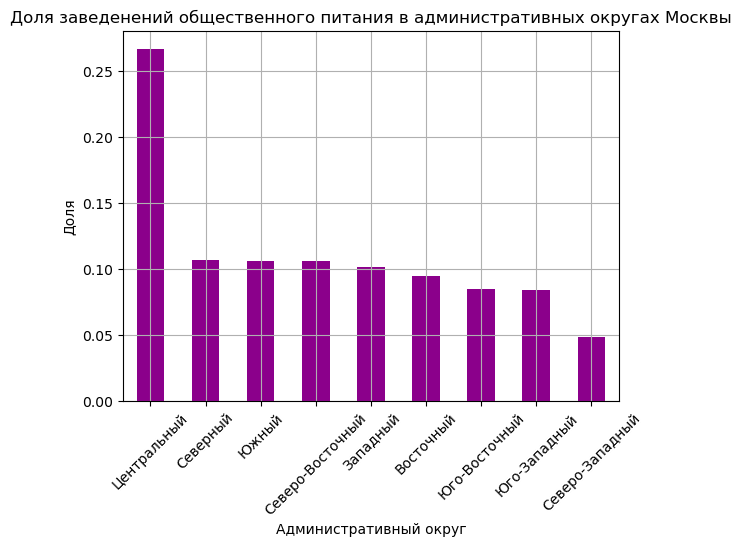

In [34]:

df['district'].value_counts(normalize = True).sort_values(ascending = False).plot(kind = 'bar',
                                   rot = 45, 
                                   title = 'Доля заведенений общественного питания в административных округах Москвы',
                                   xlabel = 'Административный округ',
                                   ylabel = 'Доля',
                                   color = 'darkmagenta')
plt.grid()
plt.show()

Более четверти всех заведений общественного питания сосредоточены в Центральном административном округе Москвы (2242, 27%). В Северном, Южном, Северо-Восточном округах число заведений примерно одинаковое, на их долю приходится примерно по 10.6% от всего общепита. Наименее насыщенный округ - Северо-Западный. В нем расположены всего 409 предприятий, что составляет около 5%. 

Отдельно исследуем распределение заведений по категориям в Центральном округе Москвы, как самом популярном.

In [35]:
display('Распределение заведений общественного питания Центрального административного округа г. Москвы')
display(df.loc[df['district'] == 'Центральный']['category'].value_counts())

display('Распределение заведений общественного питания Центрального административного округа г. Москвы в долях')
display(df.loc[df['district'] == 'Центральный']['category'].value_counts() / df.loc[df['district'] == 'Центральный административный округ'].shape[0])

'Распределение заведений общественного питания Центрального административного округа г. Москвы'

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

'Распределение заведений общественного питания Центрального административного округа г. Москвы в долях'

category
ресторан           inf
кафе               inf
кофейня            inf
бар,паб            inf
пиццерия           inf
быстрое питание    inf
столовая           inf
булочная           inf
Name: count, dtype: float64

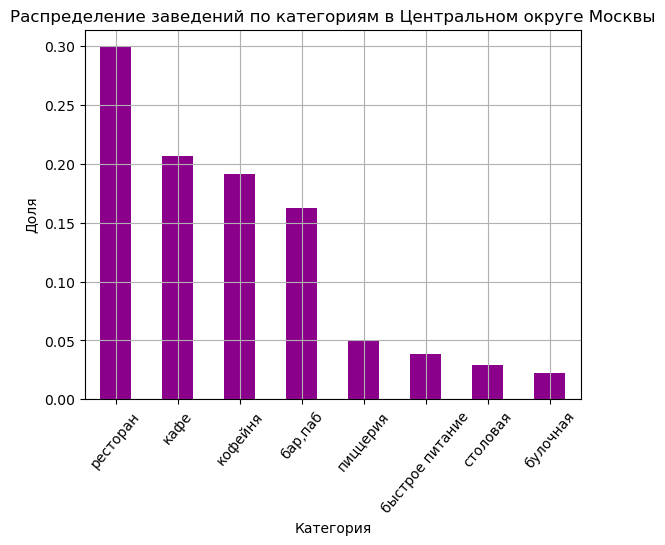

In [36]:
df.loc[df['district'] == 'Центральный']['category'].value_counts(normalize = True).plot(kind = 'bar',
                                                                title = 'Распределение заведений по категориям в Центральном округе Москвы',
                                                                rot = 50,
                                                                xlabel = 'Категория',
                                                                ylabel = 'Доля',
                                                                color = 'darkmagenta')
plt.grid()
plt.show()

Можно отметить, что наиболее популярный тип заведения в Центральном округе Москвы - это рестораны. На их долю приходится 30% (670 точек). Значения кафе, кофеен и баров/пабов 464, 428 и 364 соотвественно, что составляет от 16.2 до 20.7% от общего числа. В рейтинг самых редких заведений попадут булочные (2.2%, 50), столовые (2.9%, 66), быстрое питание (3.9%, 87) и пиццерии (5.1%, 113).

Посмотрим на распределение заведений по Москве, не учитывая Центральный округ:

In [37]:
display('Распределение заведений общественного питания без Центрального административного округа г. Москвы в долях')
df.loc[df['district'] != 'Центральный']['category'].value_counts(normalize = True)

'Распределение заведений общественного питания без Центрального административного округа г. Москвы в долях'

category
кафе               0.310390
ресторан           0.222727
кофейня            0.159903
пиццерия           0.084416
быстрое питание    0.083766
бар,паб            0.064935
столовая           0.040422
булочная           0.033442
Name: proportion, dtype: float64

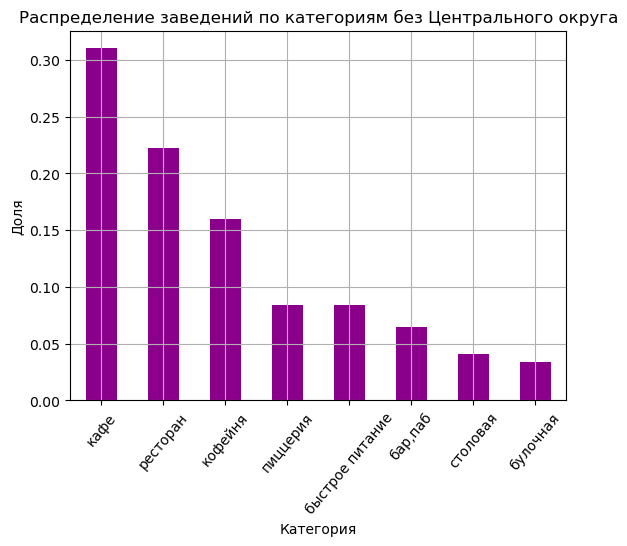

In [38]:
df.loc[df['district'] != 'Центральный']['category'].value_counts(normalize = True).plot(kind = 'bar',
                                                                title = 'Распределение заведений по категориям без Центрального округа',
                                                                rot = 50,
                                                                xlabel = 'Категория',
                                                                ylabel = 'Доля',
                                                                color = 'darkmagenta')
plt.grid()
plt.show()

Мы видим, что в округах самые популярные заведения - это кафе, которые составляют 31% общепита. На втором месте рестораны. В то время как в Центральном округе Москвы, первое место отведено рестаранам, а второе - кафе. Также заметно, что в центре бары и пабы популярынее пиццерий, на перефирии же ситуация обратная. В остальном распределения схожи. 
_____________

## 3.3 Исследование сетевых и несетевых заведений

Для начала изучим распределение сетевых и несетевых заведений по всей Москве. Для этого используем метод `value_counts()` и дополним информацию подходящей визуализацией. 

In [39]:
# Изучаем распределение сетевых и несетевых заведений в Москве: 0 - несетевое, 1 - сетевое
display('Распределение сетевых и несетевых заведений в Москве в абсолютном значении')
display(df['chain'].value_counts())

display('Распределение сетевых и несетевых заведений в Москве в относительном значении')
display(df['chain'].value_counts() / len(df))

'Распределение сетевых и несетевых заведений в Москве в абсолютном значении'

chain
0    5199
1    3203
Name: count, dtype: int64

'Распределение сетевых и несетевых заведений в Москве в относительном значении'

chain
0    0.618781
1    0.381219
Name: count, dtype: float64

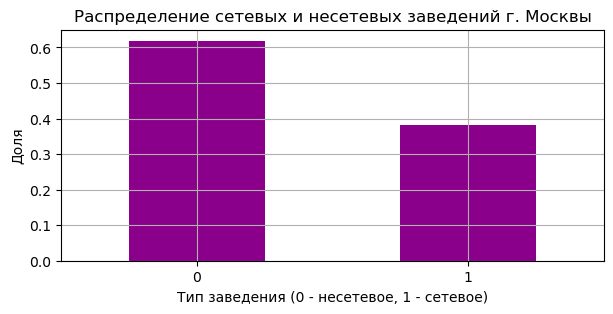

In [40]:
# Нарисуем столбчатую диаграмму для отображения информации
plt.figure(figsize=(7, 3))

df['chain'].value_counts(normalize=True).plot( kind = 'bar',
                 color = 'darkmagenta',
                 legend = False,
                 rot = 0,
                 title = 'Распределение сетевых и несетевых заведений г. Москвы',
                 xlabel = 'Тип заведения (0 - несетевое, 1 - сетевое)',
                 ylabel = 'Доля',
                 )
plt.grid()
plt.show()

Судя по графику, примерно 62% заведений Москвы несетевые. 

Изучим долю сетевых и несетевых заведений в разрезе категорий. Создадим сводную таблицу с данными о количестве сетевых/несетевых объектов по категориям. 

In [41]:
pivot_chain = pd.pivot_table(df,
                             index = 'category',
                             columns = 'chain',
                             values = 'id',
                             aggfunc = 'count')
display(pivot_chain)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


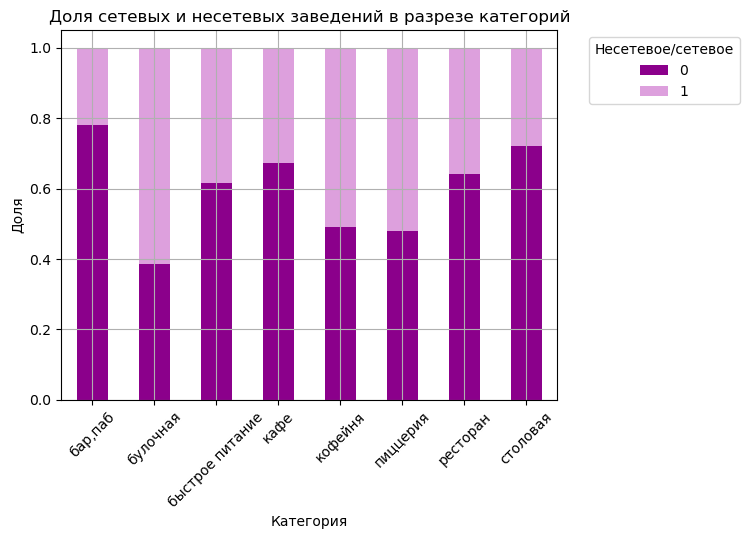

In [42]:
# Построим график столбцатой диаграммы 
grouped = df.groupby('category')['chain'].value_counts(normalize = True).unstack(fill_value = 0)
grouped.plot(kind = 'bar',
             stacked=True,
             color = ['darkmagenta', 'plum'],
            rot = 45,
            xlabel = 'Категория',
            ylabel = 'Доля',
            title = 'Доля сетевых и несетевых заведений в разрезе категорий',
            )
plt.grid()
plt.legend(title='Несетевое/сетевое', bbox_to_anchor = (1.05, 1))
plt.show()

Исходя из графика, можно заметить, что все категории заведений можно поделить на три типа:
- Преобладание сетевых заведений над несетевыми. Сюда можно отнеси булочные. Доля сетевых заведений среди них 62%. 
- Преобладание несетевых заведений.
  - Значительная часть баров/пабов, около 78%, являюся несетевыми.
  - Примерно 74% столовых г. Москвы не являются частью какой-либо сети.
  - Процент несетевых кофеен в Москве равен 68%.
  - Быстрое питание и рестораны так же являются преищественно несетевыми, процент таких заведений по 63-64%.
- Примерное равенство по сетевым и несетевым заведениям. Кофейни и пиццерии демонстрируют некоторое преобладание сетевых заведений, однако всего лишь на несколько процентов.
___________

## 3.4 Исследование посадочных мест в заведениях общественного питания

Посмотрим на данные посадочных мест `seats`. Оценим статические показатели. Для этого используем метод `describe()`:

In [43]:
df['seats'].describe()

count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее значение и медиана не совпадают. Это может указывать на вбросы в данных, аномально-высокие и аномально-низкие значения. стандартное отклонение 122 достаточно велико при среднем 108, что может быть причиной большого разброса данных. Обратим внимание на максимальное значение 1288. Сложно представить заведение общественного питания с таким количеством посадочных мест. Возможно, эти данные вызваны технической ошибкой. Причиной минимального значения 0 может стать тот факт, что заведение работает только на вынос и доставку. 

Для более подробного знакомства с данные построим гистограмму.

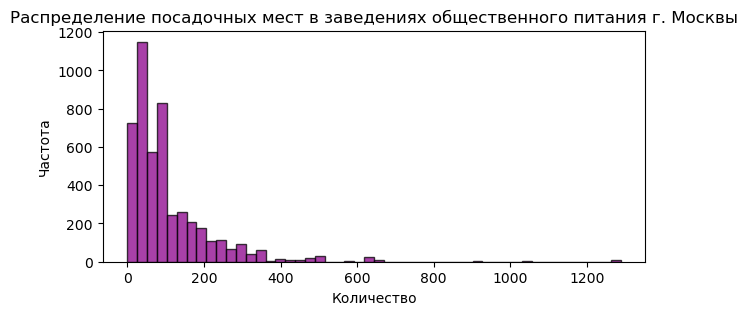

In [44]:
plt.figure(figsize=(7, 3))

df['seats'].plot(kind = 'hist',
                 bins = 50,
                 color = 'darkmagenta',
                 edgecolor = 'black',
                 rot = 0,
                 alpha = 0.75,
                 title = 'Распределение посадочных мест в заведениях общественного питания г. Москвы',
                 xlabel = 'Количество',
                 ylabel = 'Частота')
plt.show()

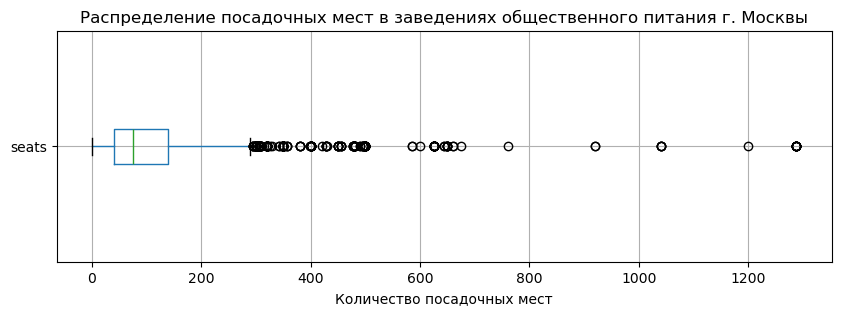

In [45]:
plt.figure(figsize = (10,3))

df.boxplot(column = 'seats', vert = False)
plt.title('Распределение посадочных мест в заведениях общественного питания г. Москвы')
plt.xlabel('Количество посадочных мест')
plt.show()

Распределение посадочных мест ассиметричное, скошено вправо. Минимальное количество посадочных мест - 0, а максимальное - 1288, что маловероятно является корректным. По диаграмме размаха видно, что значения выше примерно 290 можно считать выбросами.

Посмотрим на диаграмму размаха для каждой категории заведения отдельно. Возможно, выбросы находятся в одной конкретной категории, и тогда они могут быть не ошибкой данных. 

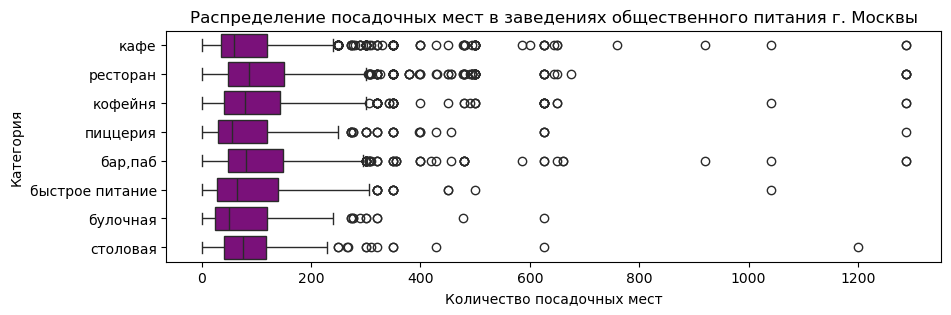

In [46]:
plt.figure(figsize = (10,3))

sns.boxplot(data = df, x = 'seats', y = 'category', color = 'darkmagenta')
plt.title('Распределение посадочных мест в заведениях общественного питания г. Москвы')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория')
plt.show()

По графику видно, что выбросы, превыщающие 75 процентиль, распределены между всеми категориями заведений. Поэтому будем считать их выбросами.

In [47]:
# Найдем границу, по которой будем фильтровать посадочные места
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)

IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')

Верхний порог выбросов: 290.0


In [48]:
#Фильтрация для дальнейшей аналитики посадочных мест
new_df = df.loc[df['seats'] < 290]

Теперь посчитаем для каждой категории заведения наиболее типичное количество посадочных мест: найдем медиану и среднее значение.

In [49]:
new_df.groupby('category')['seats'].agg(['median','mean'])

,median,mean
category,,
"бар,паб",76.0,88.338860
булочная,48.0,75.148933
быстрое питание,60.0,81.164635
кафе,53.5,75.315010
кофейня,70.0,84.548988
пиццерия,50.0,76.837440
ресторан,80.0,96.231689
столовая,70.0,78.554840


Для построения графика будем использовать медиану, так как она отобразит более близкие к реальности центральные позиции. Средние значения могут исказить ситуацию, так как в данных присутствуют заведения, число посадочных мест которых намного больше медианы.

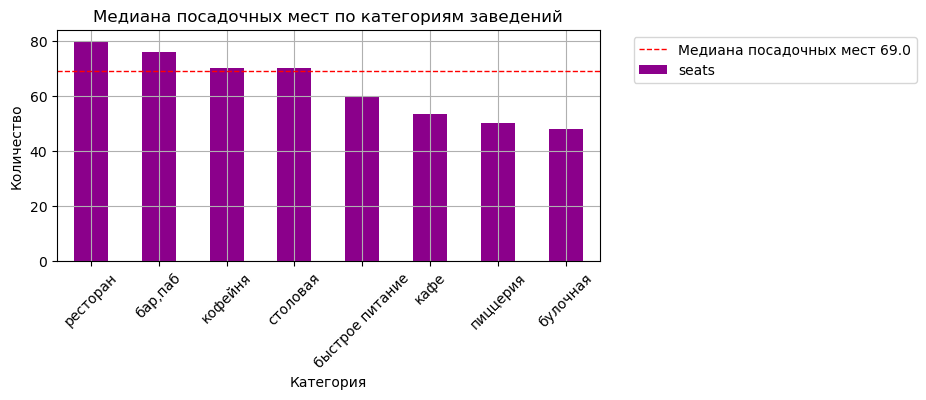

In [50]:
new_df.groupby('category')['seats'].median().sort_values(ascending = False).plot(kind = 'bar',
                                               figsize = (7,3),
                                               color = 'darkmagenta',
                                               rot = 45,
                                               grid = True,
                                               title = 'Медиана посадочных мест по категориям заведений',
                                               xlabel = 'Категория',
                                               ylabel = 'Количество')
median_seats = new_df['seats'].median()
plt.axhline(median_seats, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Медиана посадочных мест {round(median_seats,2)}')

plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Можно сделать такие выводы:
- Медиана посадочных мест - 69.
- Наиболее вместительными являются рестораны. Наиболее типичное количество посадочных мест - 80.
- Чуть меньше бары и пабы, для которых этот показатель равен 76.
- Кофейни находятся на третьем месте по этому критерию. Число их посадочных мест - 70, как и у столовых.
- Ниже медианного значения посадочных мест располагаются заведения быстрого питания, их показатель 60.
- Показатели кафе и пиццерии - 53.5 и 50 соотвественно.
- Наименее вместительными являются булочные, для которых характерно 48 посадочных мест.
_____________________

## 3.5 Исследование рейтинга заведений

Найдем средний рейтинг для заведений каждой категории и визуализируем результаты.

In [51]:
df.groupby('category')['rating'].mean()

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124284
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32

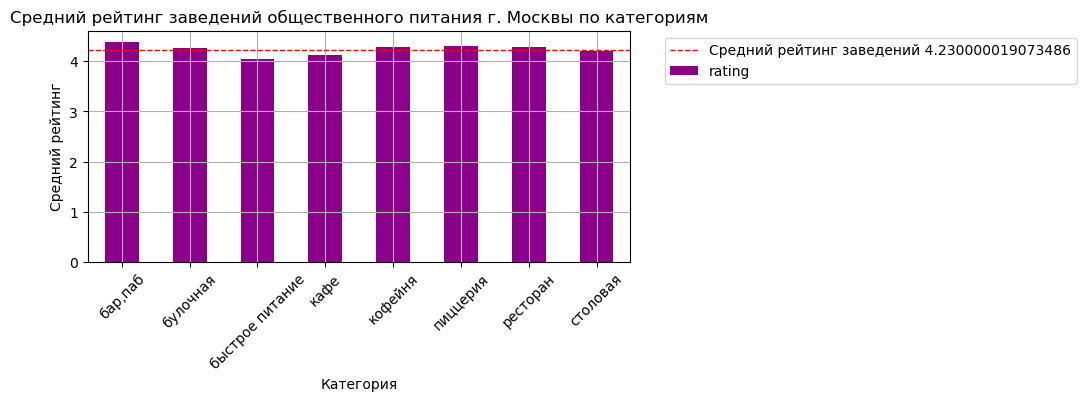

In [52]:
df.groupby('category')['rating'].mean().plot(kind = 'bar',
                                             figsize = (7,3),
                                             color = 'darkmagenta',
                                             rot = 45,
                                             title = 'Средний рейтинг заведений общественного питания г. Москвы по категориям',
                                             xlabel = 'Категория',
                                             ylabel = 'Средний рейтинг',
                                             grid = True)

mean_rating_share = df['rating'].mean()
plt.axhline(mean_rating_share, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Средний рейтинг заведений {round(mean_rating_share,4)}')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Наименьшее значение (4.05) среднего рейтинга принадлежит заведениям быстрого питания, это значение находится ниже среднего по Москве. А наибольшее (4.4) - барам и пабам. Однако мы видим, что средние значения рейтинга не сильно отличаются по категориям. 

Можно сделать вывод, что категория общественного заведения не влияет на рейтинг.
_____________________________________________

## 3.6 Изучение взаимосвязи рейтинга заведения с другими показателями датафрейма

Чтобы понять, существует ли связь между рейтингом и другими данными, используем матрицу корреляции. Для составления корреляции отберем параметры, которые могут влиять на рейтинг заведения: категория заведения, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

In [53]:
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by = 'rating', ascending = False)

interval columns not set, guessing: ['rating', 'chain', 'seats']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


Наибольшая корреляция рейтинга наблюдается с ценовой категорией (0.26). Для остальных показателей коэффициент находится в диапозоне 0.12-0.2 и 0 в случае с посадочными местами. Мы не можем сказать, что между данными наблюдается сильная связь. Однако можно проверить столбец `price`, так как он имеет наибольший коэффициент.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

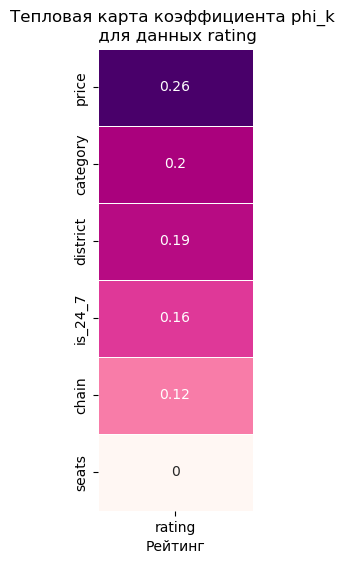

In [54]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by = 'rating', ascending = False)

sns.heatmap(data = data_heatmap,
            annot = True,
            cmap = 'RdPu',
            linewidth = 0.5,
            cbar = False)

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')
plt.show()

Теперь корреляция между изменением рейтинга и другими признаками наглядно отображена. Можно продолжить исследование данных.

Проверим связь между изменением рейтинга и ценовой категорией заведения.

In [55]:
grouped = df.groupby('price')['rating'].mean().sort_values(ascending = False)
display('Средний рейтинг в зависимости от ценовой категории заведения')
display(grouped)

'Средний рейтинг в зависимости от ценовой категории заведения'

price
высокие          4.436611
выше среднего    4.386347
средние          4.297874
низкие           4.173077
Name: rating, dtype: float32

Для наглядности создадим график распределения рейтинга в зависимости от ценовой категории.

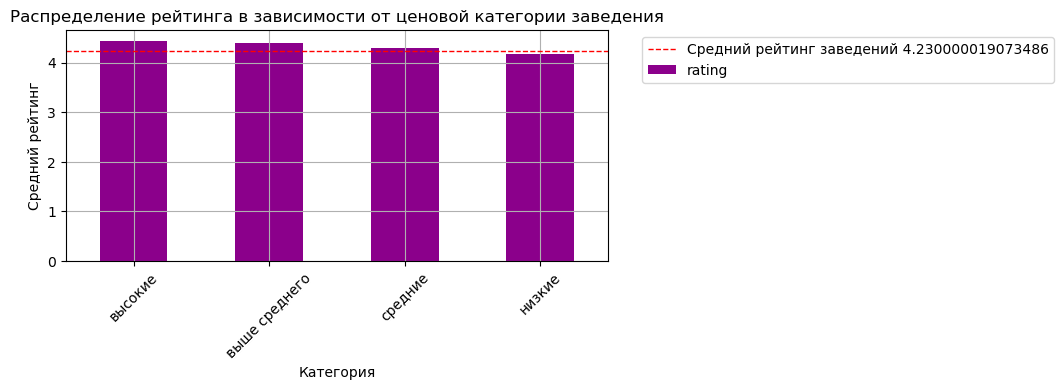

In [56]:
grouped.plot(kind = 'bar',
             rot = 45,
             color = 'darkmagenta',
             figsize = (7,3),
             title = 'Распределение рейтинга в зависимости от ценовой категории заведения',
             xlabel = 'Категория',
             ylabel = 'Средний рейтинг',
             grid = True)

mean_rating_share = df['rating'].mean()
plt.axhline(mean_rating_share, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Средний рейтинг заведений {round(mean_rating_share,4)}')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Мы получили такие результаты:
- Заведения с низкой ценовой каегорией: средний рейтинг 4.2.
- Заведения со средней ценовой категорией: средний рейтинг 4.3.
- Заведения с ценовой категорией выше среднего: средний рейтинг 4.4.
- Заведения с высокой ценовой категорией: средний рейтинг 4.44.

Можно заметить небольшой тренд на возрастание рейтинга с ростом ценовой категории. Однако изменения незначительны, поэтому с уверенностью говорить, что ценовая категория влияет на рейтинг, мы не можем. 
___

## 3.7 Исследование популярности сетевых заведений Москвы

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.

In [57]:
chain_len = df.groupby('name')['chain'].sum().sort_values(ascending = False)
top_15_chain = chain_len[:15]
display('Топ-15 популярных сетей в Москве')
display(top_15_chain)

'Топ-15 популярных сетей в Москве'

name
шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
буханка                                 32
cofefest                                32
му-му                                   27
Name: chain, dtype: int8

In [58]:
# Создадим новый датафрейм с информацией о топ-15 заведений
names_15_top = top_15_chain.index.to_list()
df_top_15 = df.loc[df['name'].isin(names_15_top)]

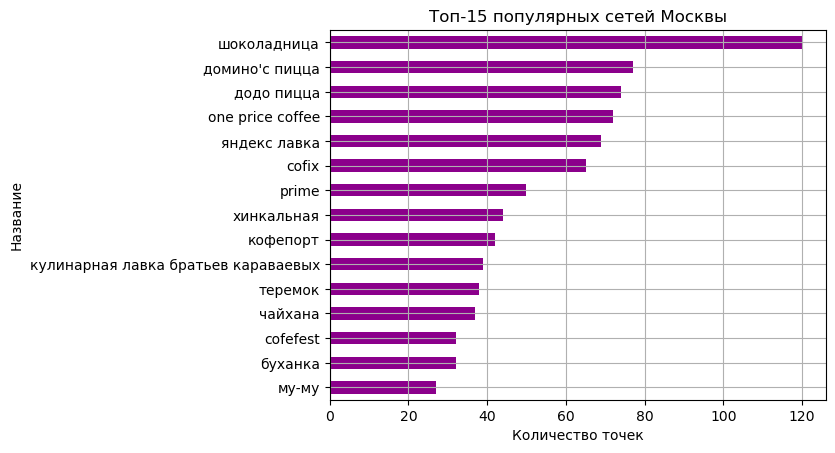

In [59]:
df_top_15['name'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                    color = 'darkmagenta',
                                                                    title = 'Топ-15 популярных сетей Москвы',
                                                                    xlabel = 'Количество точек',
                                                                    ylabel = 'Название',
                                                                   grid = True, 
                                                                    rot = 0)
plt.show()

In [60]:
# Посмотрим, какие категории заведений находятся в топ-15
df['category'].loc[df['name'].isin(names_15_top)].unique()

array(['булочная', 'пиццерия', 'кофейня', 'кафе', 'ресторан',
       'быстрое питание', 'столовая', 'бар,паб'], dtype=object)

В топ-15 вошли:
- Шоколадница                       
- Домино'с пицца                        
- Додо пицца                              
- one price coffee                     
- Яндекс лавка                       
- Cofix                 
- Prime                                  
- Хинкальная                            
- Кофепорт                             
- Кулинарная лавка братьев Караваевых   
- Теремок      
- Чайхана 
- Буханка
- Сofefest
- Му-му

Среди заведений представлены все категории. Это означает, что категория не влияет на популярность. 

На первом месте с большим отрывом по популярности оказалась 'Шоколадница', которой принадлежит 120 точек. Второе место в топе занимает 'Домино'с пицца' (76), а третье - 'Додо пицца' (74). Интересно, что два из трех первых мест занимают пиццерии. 

Посчитаем средний рейтинг для этих заведений.

In [61]:
# Посчитаем общий средний рейтинг для этих заведений
display('Общий средний рейтинг топ-15 заведений')
display(round(df_top_15['rating'].mean(),2))
display('Средний рейтинг каждой сети заведений из топ-15')
top_15_avg_rating = df.loc[df['name'].isin(names_15_top)].groupby('name')['rating'].mean().sort_values(ascending = False)
display(top_15_avg_rating)

'Общий средний рейтинг топ-15 заведений'

4.15

'Средний рейтинг каждой сети заведений из топ-15'

name
буханка                                4.396875
кулинарная лавка братьев караваевых    4.394872
хинкальная                             4.322727
додо пицца                             4.286487
му-му                                  4.229630
шоколадница                            4.177500
домино'с пицца                         4.171428
кофепорт                               4.147619
теремок                                4.123684
prime                                  4.116000
cofix                                  4.075385
one price coffee                       4.069445
cofefest                               3.984375
чайхана                                3.924324
яндекс лавка                           3.872464
Name: rating, dtype: float32

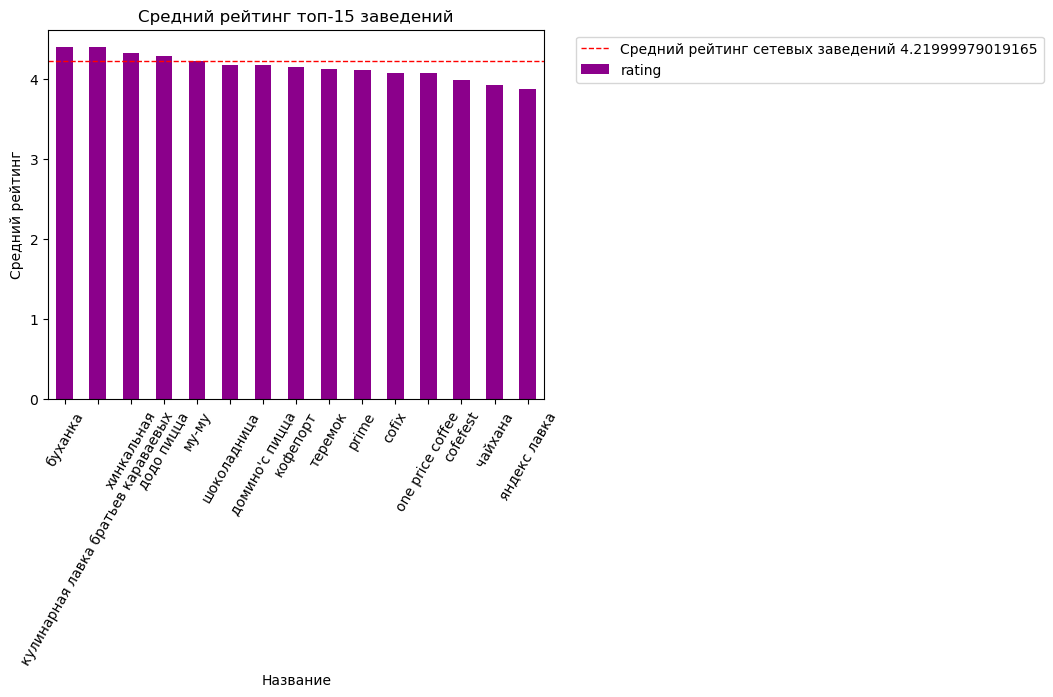

In [62]:
top_15_avg_rating.plot(kind = 'bar',
                      rot = 60,
                       color = 'darkmagenta',
                       title = 'Средний рейтинг топ-15 заведений',
                       xlabel = 'Название',
                       ylabel = 'Средний рейтинг',
                      )
# Добавим линию среднего рейтинга сетевых заведений по Москве
mean_rating_chain = df['rating'].loc[df['chain'] == 1].mean()
plt.axhline(mean_rating_chain, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Средний рейтинг сетевых заведений {round(mean_rating_chain,2)}')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Общий средний рейтинг этих заведений составил 4.15, что ниже среднего рейтинга сетевых заведений Москвы. 

Буханка, Хинкальная, Кулинарная лавка братьев Караваевых, Додо пицца имеют рейтинг более высокий, чем средний по Москве. Однако значения среднего рейтинга заведений в топе-15 не сильно разнятся, они лежат в диапозоне от 3.87 до 4.4.
___________________

## 3.8 Изучение взаимосвязи среднего чека с районами Москвы

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Для начала найдем средний чек по Москве, а затем по округам.

In [63]:
print('Статистические показатели столбца middle_avg_bill:')
df['middle_avg_bill'].describe()

Статистические показатели столбца middle_avg_bill:


count     3149.000000
mean       958.053650
std       1009.734436
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Можно предположить, что данные баланса имеют распределение, близкое к нормальному, но с правым хвостом. Значение стандартного отклонения - 1009.73 - в пределах нормы, так как в датафрейме представлены заведения разных ценовых категорий. Минимальное значение равно 0. Скорее всего, это ошибка данных. Отфильтруем данную строчку при анализе. Максимальное значение - 35000 - вполне возможно в московских ресторанах. Но для проверки пострим диаграмму размаха для столбца `middle_avg_bill` для каждого административного округа Москвы. 

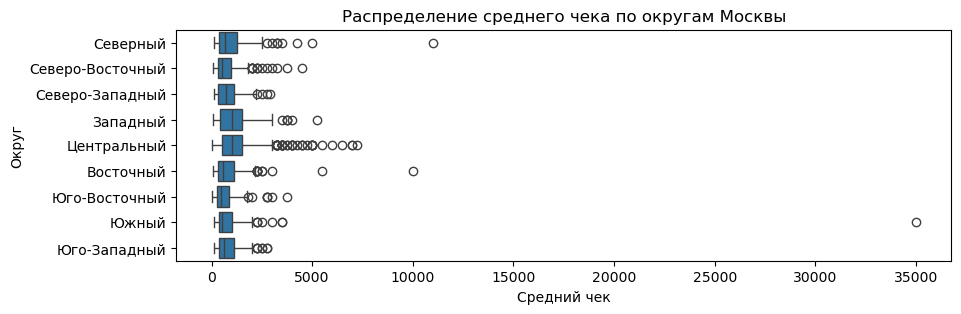

In [64]:
plt.figure(figsize = (10,3))
sns.boxplot(data=df, x='middle_avg_bill', y='district')

plt.title('Распределение среднего чека по округам Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Округ')
plt.show()

Число 35000 явно выходит за рамки возможных значений. Скорее всего, это вброс, точно так же как и последние значения Северного и Восточного округов. Маловероятно, что там могут быть цены выше, чем в Центральном районе Москвы. Остальные значения выглядят реалистично и не являются ошибкой в данных. Чтобы не искажать наш анализ, будем использовать медианные значения среднего чека.

In [65]:
# Для удобства создадим отфильтрованный датафрейм, где не будет строки со средним чеком 0
df_filtered = df.loc[df['middle_avg_bill'] != 0]

In [66]:
# Медиана чека по Москве
moscow_avg_bill = df_filtered['middle_avg_bill'].median()
display(f'Медиана чека по Москве {round(moscow_avg_bill,4)}')

'Медиана чека по Москве 750.0'

In [67]:
# Средний чек по округам
display('Медианный чек в зависимости от округа Москвы')
grouped = df_filtered.groupby('district')['middle_avg_bill'].median().sort_values(ascending = False)
display(grouped)

'Медианный чек в зависимости от округа Москвы'

district
Западный            1000.0
Центральный         1000.0
Северо-Западный      700.0
Северный             650.0
Юго-Западный         600.0
Восточный            575.0
Северо-Восточный     500.0
Южный                500.0
Юго-Восточный        450.0
Name: middle_avg_bill, dtype: float32

Построим визуализацию для наглядного представления данных.

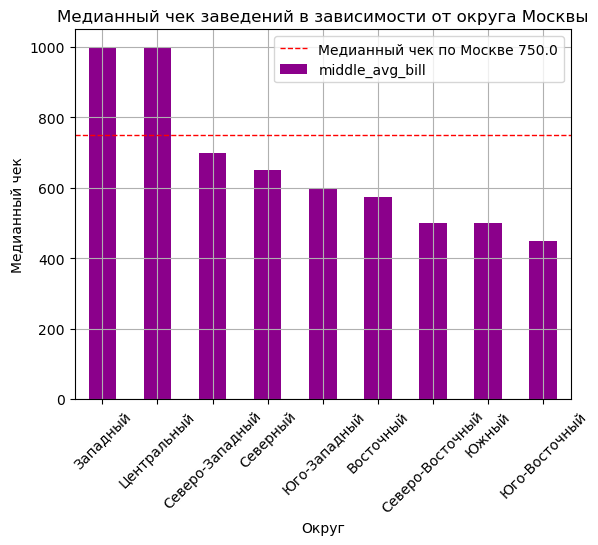

In [68]:
grouped.plot(kind = 'bar',
             color = 'darkmagenta',
             title = 'Медианный чек заведений в зависимости от округа Москвы',
             xlabel = 'Округ',
             ylabel = 'Медианный чек',
            rot = 45,
            grid = True)

plt.axhline(moscow_avg_bill, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Медианный чек по Москве {round(moscow_avg_bill,2)}')
plt.legend()
plt.show()

Из данных можно сделать такие выводы:
- Медианный чек по Москве 750 р.
- Самый высокий медианный чек в Центральном и Западном административном округах. Он равен 1000 р.
- Начиная с Северо-Западного округа, медианный чек района становится меньше московского и значительно снидается относительно Западного и Центрального округов. Здесь он равен 700 р.
- Самые низкий медианный чек имеют заведения, располагающиеся в Юго-Восточном (450 р.) округе.

Таким образом, отдаленность от центра влияет на цены: они снижаются, в то время как Центральный и Западный округа характеризуется самыми высокими показателями.

Построим сводную таблицу, которая позволит нам увидеть медианный чек в разрезе категории заведения и его местоположения:

In [69]:
# Создаем сводную таблицу 
pivot_bill = pd.pivot_table(df_filtered,
                            index = 'district',
                            columns = 'category',
                            values = 'middle_avg_bill',
                            aggfunc = 'median')
#Переносим ее в датафрейм
df_pivot_median_bill = pd.DataFrame(pivot_bill)
# Окрашиваем столбцы для наглядности
df_pivot_median_bill = df_pivot_median_bill.style.background_gradient(cmap='RdPu', axis=0)
display('Медианный чек в зависимости от округа и категории заведения')
display(df_pivot_median_bill)

'Медианный чек в зависимости от округа и категории заведения'

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный,1200.000000,300.000000,375.000000,450.000000,400.000000,500.000000,1000.000000,300.000000
Западный,1250.000000,600.000000,367.500000,625.000000,600.000000,700.000000,1300.000000,300.000000
Северный,1250.000000,625.000000,300.000000,550.000000,325.000000,650.000000,1187.500000,300.000000
Северо-Восточный,900.000000,500.000000,425.000000,475.000000,325.000000,500.000000,837.500000,275.000000
Северо-Западный,1000.000000,200.000000,275.000000,650.000000,325.000000,549.500000,1250.000000,300.000000
Центральный,1250.000000,962.500000,450.000000,700.000000,500.000000,1000.000000,1250.000000,300.000000
Юго-Восточный,925.000000,375.000000,300.000000,400.000000,250.000000,500.000000,925.000000,275.000000
Юго-Западный,1000.000000,500.000000,375.000000,450.000000,375.000000,500.000000,1050.000000,305.000000
Южный,1175.000000,437.500000,400.000000,600.000000,387.500000,500.000000,975.000000,282.500000


Пользуясь полученными данными, делаем такие выводы:
- Бары, пабы и рестораны имеют значительно более высокие медианные чеки, чем остальные категории заведений, независимо от округа в котором они расположены. 
- Как правило, самые высокие медианные чеки по всем категориям в Центральном и Западном административном округах.
- Столовые - категория заведений, где самые низкие чеки.
_____________

## 3.9 Дополнительные исследования взаимосвязей 

### 3.9.1 Изучение взаимосвязи часов работы с другими факторами

Для анализа будем использовать столбец `is_24_7`, который содержит значения:
- `True` - в случае, если заведение работает ежедневно и круглосуточно
- `False` - если заведение имеет иной график.

Начнем с построения матрицы корреляции.

In [70]:
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'middle_coffee_cup', 'middle_avg_bill']].phik_matrix()

display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'is_24_7'][['is_24_7']].sort_values(by = 'is_24_7', ascending = False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_coffee_cup', 'middle_avg_bill']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,is_24_7
category,0.244815
middle_coffee_cup,0.222250
rating,0.161010
price,0.084183
district,0.076357
middle_avg_bill,0.046124
chain,0.043488
seats,0.043193


Дополним данные тепловой картой. 

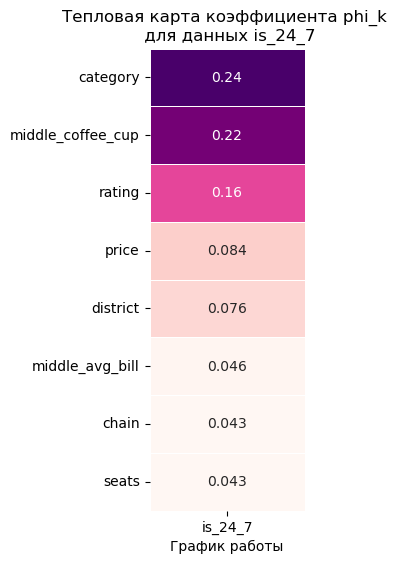

In [71]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'is_24_7'][['is_24_7']].sort_values(by = 'is_24_7', ascending = False)

sns.heatmap(data = data_heatmap,
            annot = True,
            cmap = 'RdPu',
            linewidth = 0.5,
            cbar = False)

plt.title('Тепловая карта коэффициента phi_k \n для данных is_24_7')
plt.xlabel('График работы')
plt.show()

Видно, что наибольшая связь столбец `is_balance` имеет с категорией заведения, коэффициент корреляции равен 0.24. Это небольшой показатель, поэтому говорить о сильной зависимости нельзя.
Столбец `middle_coffee_cup` имеет чуть меньшую корреляцию (0.22) с рассматриваемым столбцом. 
Корреляция с остальными столбцами находится в диапозоне от 0.043 до 0.15. Это говорит об отсутствии связи между данными.

По полученным результатам, можно предположить, что определенные категории заведение склонны к круглосуточной и ежедневной работе. Проверим нашу гипотезу.

In [72]:
# Количество заведений с ежедневной и круглосуточной работой в абсолютном значении
display('Количество заведений с ежедневной и круглосуточной работой в абсолютном значении')
display(df.groupby('category')['is_24_7'].sum().sort_values(ascending = False))
display('Количество заведений с ежедневной и круглосуточной работой в относительном')
df.groupby('category')['is_24_7'].mean().sort_values(ascending = False)

'Количество заведений с ежедневной и круглосуточной работой в абсолютном значении'

category
кафе               267
быстрое питание    150
ресторан           135
кофейня             59
бар,паб             52
пиццерия            31
булочная            24
столовая            12
Name: is_24_7, dtype: int64

'Количество заведений с ежедневной и круглосуточной работой в относительном'

category
быстрое питание    0.248756
кафе               0.112374
булочная           0.093750
бар,паб            0.068063
ресторан           0.066112
пиццерия           0.048973
кофейня            0.041755
столовая           0.038095
Name: is_24_7, dtype: float64

Добавим график для наглядности.

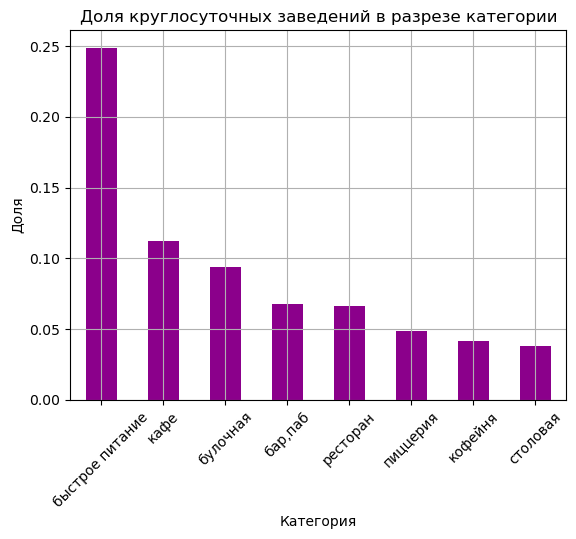

In [73]:
grouped = df.groupby('category')['is_24_7'].mean().sort_values(ascending = False)
grouped.plot(kind = 'bar',
             color = 'darkmagenta',
             rot = 45,
             grid = True,
             title = 'Доля круглосуточных заведений в разрезе категории',
             xlabel = 'Категория',
             ylabel = 'Доля')
plt.show()

По графику видно, что около четверти всех заведений быстрого питания работают ежедневно и круглосуточно. Это наблюдение подкрепляется реальностью. Связь с другими категориями не прослеживается.

Таким образом, между круглосуточным графиком работы и категорией заведения нет связи.

____________

### 3.9.2 Изучение взаимосвязи стоимости чашки кофе и других факторов

Для анализа этого параметра будем использовать столбец `middle_coffee_cup`, содержащий оценку одной чашки капучино. Для начала посмотрим статистическую информацию по этому столбцу.

In [74]:
df['middle_coffee_cup'].describe()

count     535.000000
mean      174.721497
std        88.951088
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

По данным можно предположить, что в связи с близостью среднего значение и медианы, столбец имеет нормальное распределение данных. Стандартное отклонение в пределах нормы для цены чашки каппучино. Минимальное значение - 60. А максимальное - 1568, что может быть вбросом данных. Рассмотрим распределение подробнее на диаграмме размаха.

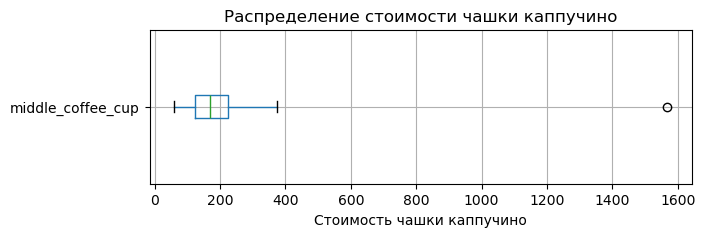

In [75]:
plt.figure(figsize=(7, 2))

df.boxplot(column='middle_coffee_cup', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение стоимости чашки каппучино')
plt.xlabel('Стоимость чашки каппучино')

# Выводим график
plt.show()

Единственной точкой, выходящей за 75 процентиль диаграммы, является значение 1568 р. Это аномально высокое значение нужно отфильтровать, так как это явная ошибка данных.

In [76]:
# Создадим отфильтрованный датафрейм, исключив аномальное значение
df_filtered = df.loc[df['middle_coffee_cup'] != 1568]

Построим матрицу корреляции столбца `middle_coffee_cup` с другими характеристиками заведений.

In [77]:
correlation_matrix = df_filtered[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'middle_coffee_cup']].phik_matrix()

display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'middle_coffee_cup'][['middle_coffee_cup']].sort_values(by = 'middle_coffee_cup', ascending = False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_coffee_cup']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,middle_coffee_cup
chain,0.596611
price,0.391939
district,0.214088
is_24_7,0.200020
rating,0.185182
category,0.000000
seats,0.000000


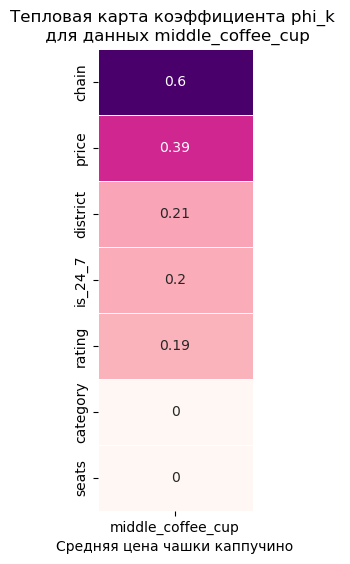

In [78]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'middle_coffee_cup'][['middle_coffee_cup']].sort_values(by = 'middle_coffee_cup', ascending = False)

sns.heatmap(data = data_heatmap,
            annot = True,
            cmap = 'RdPu',
            linewidth = 0.5,
            cbar = False)

plt.title('Тепловая карта коэффициента phi_k \n для данных middle_coffee_cup')
plt.xlabel('Средняя цена чашки каппучино')
plt.show()

Коэффициент корреляции со столбцом `chain`, равный 0.6, говорит об умеренной связи со средней ценой на чашку каппучино. Сетевые и несетевые заведения могут иметь заметную разницу в ценах. Возможно, чашка кофе в сетевых заведениях стоит дешевле, чем в иных. Необходимо проверить эту гипотезу.
Также умеренная связь (коэффициент корреляции 0.48) прослеживается со столбцом `price`. Это логично, так как в заведениях с категорией цен 'высокие' можно ожидать высоких цен на каппучино, то есть будет соблюдаться пропорциональность ценовой категории и самой цены. Для остальных столбцов коэффициент корреляции равен от 0 до 0.21, что говорит об отсутствии зависимостей.

Проверим нашу гипотезу о связи показателя `chain` со стоимостью чашки каппучино.

In [79]:
grouped = df_filtered.groupby('chain')['middle_coffee_cup'].mean().sort_values(ascending = False)
display(grouped)

chain
0    177.224258
1    166.805344
Name: middle_coffee_cup, dtype: float32

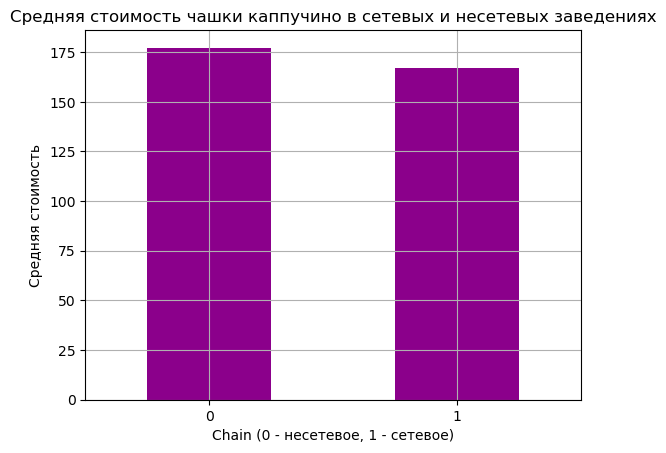

In [80]:
grouped.plot(kind = 'bar',
             color = 'darkmagenta',
             rot = 0,
             grid = True,
             title = 'Средняя стоимость чашки каппучино в сетевых и несетевых заведениях',
             xlabel = 'Chain (0 - несетевое, 1 - сетевое)',
             ylabel = 'Средняя стоимость')
plt.show()

Чашка каппучино в несетевых заведениях в среднем дороже и стоит 177.22 р. В то время как такая же чашка в сетевом заведении обойдется в 166.8 р. Разница незначительна. Поэтому мы не можем утверждать, что наличие сетевых заведений влияет на стоимость одной чашки кофе. 

Убедимся, что коэффициент корреляции со столбцом `price` говорит о пропорциональной связи между ценовой категорией заведения и средней стоимостью чашки каппучино.

In [81]:
grouped = df_filtered.groupby('price')['middle_coffee_cup'].mean().sort_values(ascending = False)
display('Средняя стоимость одной чашки каппучино в зависимости от ценовой категории заведения')
display(grouped)

'Средняя стоимость одной чашки каппучино в зависимости от ценовой категории заведения'

price
высокие          250.000000
средние          203.142853
выше среднего    203.000000
низкие           136.614029
Name: middle_coffee_cup, dtype: float32

Да, действительно. Чем выше ценовая категория, тем выше цена на чашку каппучино. И наоборот.

Таким образом, нами не было выявлено явных связей между показателями заведений с друг другом. 
_____________

## 4. Итогововый вывод и рекомендации
### 4.1 Общий обзор проделанной работы

В ходе исследования проанализировали данные 8402 заведений общественного питания Москвы. Данные включали информацию о названии, категории, расположении и другие характеристики заведений. Акцент исследования был на том, чтобы найти для заказчиков наиболее выгодное место для открытия своей точки общественного питания. 
____


### 4.2 Ответы на исследовательские вопросы и главные выводы.
 В ходе исследования мы получили такие результаты:
 - Сфера общественного питания Москвы представлена 8402 заведениями. Наиболее популярны кафе, на их долю приходится 28%. Реже всего встречаются булочные, всего 5%.
 - Около четверти заведений расположны в Центральном административном округе, где 30% составляют рестораны. Менее представлены здесь булочные.
 - Наименее насыщенный округ - это Северо-Западный, в нем располагается 409 предприятий.
 - Более 62% заведений являются несетевыми. При рассмотрении заведений в разрезе категорий выяснилось, что преобладание сетевого устройства характерно лишь для булочных. Бары, пабы, столовые, кофейни, быстрое питание и рестораны преимущественно несетевые (от 63 до 78%). Остальные категории распределены равномерно.
 - Медианное количество посадочных мест 69. Большее количество мест содержат рестораны, наиболее типичное значение для них 80.
 - Между рейтингом и категорией заведения нет прямой зависимости, точно так же как и между рейтингом и ценовым уровнем.
 - Наиболее распространенная сеть заведений - 'Шоколадница', всего 120 точек, рейтинг составляет 4.18, что ниже среднего рейтинга сетевых заведений. Лидером популярных сетей по рейтингу является 'Буханка' с рейтингом 4.4.
 - Значение медианного чека рознится по округам Москвы. Наиболее высокое значение в Центральном и Западном округах (1000 р.). Это единственные округа, где медианное значение чека выше медианного по всей Москве (750 р.). Самый показатель на юго-востоке (450 р.).
 - График работы не имеет прямой связи с другими показателями данных. Средняя цена чашки каппучино не связана ни с чем, кроме ценовой категории заведения.
_________

### 4.3 Рекомендации

Мы предлагаем несколько рекомендаций:
1. Не стоит открывать заведение в Центральном округе, так как там большая насыщенность и высокая конкуренция. Можно рассмотреть районы с меньшим числом предприятий. Например, Северо-Западный округ, где сосредоточено меньше всего заведений и средний чек составляет 822.22 р. Таким образом, удастся избежать высокой конкуренции, а стоимость ведения бизнеса, как минимум аренды помещения, будет меньше. Не стоит выбирать юго-восточный район, так как там самый низкий средний чек среди всей Москвы. 
2. Так как сфера булочных наименее развита в Москве, рассмотрите возможность открытия одной из них. Для принятия решения лучше провести более подробный анализ.
3. Круглосуточный график работы магазина не станет преимуществом, так как не имеет прямой связи с рейтингом, ценами и другими показателями. Поэтому не стоит нести лишние затраты на это.